# WeatherPy - Tyler Hill

In [62]:
import pandas as pd
import requests
import json
import random
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

In [2]:
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Create lists to store values from for-loop
lats = []
lons = []
cities = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Declare number of samples to calculate
num_samples = 1500

for x in range(num_samples):
    
    # Randomly generate Latitude and Longitude, append values
    lat = random.uniform(-90,90)
    lon = random.uniform(-180,180)
    
    # Grab nearest city from Lat + Lon, then append 'cities' list
    city = citipy.nearest_city(lat, lon)
    f_city = city.city_name.title()
    f_country = city.country_code.upper()
    city_country = f'{f_city}, {f_country}'
    if city_country not in cities:
        cities.append(city_country)
print(f'{len(cities)} cities collected')

612 cities collected


In [4]:
city = []
c_lats = []
c_lons = []
for i, response in enumerate(cities):
    q_url = f'{url}&units={units}&q={cities[i]}&APPID={weather_api_key}'
    response = requests.get(q_url).json()
    try:
        temp = response["main"]["temp"]
        humid = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        latc = response["coord"]["lat"]
        lonc = response["coord"]["lon"]
        c_lats.append(latc)
        c_lons.append(lonc)
        city.append(cities[i])
        temperature.append(temp)
        humidity.append(humid)
        cloudiness.append(cloud)
        wind_speed.append(wind)
        print(f'[{i}]: {cities[i]}')
    except:
        print("No data")
        pass
print("-----------------------")
print("Data retrieval complete")

[0]: Ushuaia, AR
[1]: Umm Lajj, SA
[2]: Council Bluffs, US
[3]: Olafsvik, IS
[4]: Busselton, AU
[5]: Alofi, NU
[6]: Huarmey, PE
No data
[8]: Roald, NO
[9]: Sitka, US
[10]: Bubaque, GW
[11]: Rikitea, PF
[12]: Bandarbeyla, SO
[13]: Kaitangata, NZ
[14]: Ballina, IE
No data
[16]: Norman Wells, CA
[17]: Bac Lieu, VN
[18]: Acapulco, MX
[19]: Hambantota, LK
[20]: Vaini, TO
[21]: Punta Arenas, CL
[22]: Yellowknife, CA
[23]: Bredasdorp, ZA
[24]: Bira, RU
[25]: Boende, CD
[26]: Hilo, US
[27]: Labuhan, ID
[28]: Constitucion, MX
[29]: Santa Marta, CO
[30]: Salalah, OM
[31]: East London, ZA
[32]: Bluff, NZ
No data
[34]: Vardenis, AM
[35]: Misratah, LY
[36]: Victoria, SC
[37]: Arlit, NE
No data
[39]: Muncar, ID
[40]: Igrim, RU
[41]: Cap Malheureux, MU
No data
[43]: Puerto Ayora, EC
[44]: Narsaq, GL
[45]: Chokurdakh, RU
[46]: Georgetown, SH
[47]: Vila Velha, BR
[48]: Qaanaaq, GL
No data
[50]: Tashtyp, RU
[51]: Jamestown, SH
[52]: Port Elizabeth, ZA
[53]: Kota Kinabalu, MY
[54]: Upernavik, GL
[55]: Ar

[433]: Sarkand, KZ
[434]: Kutum, SD
No data
[436]: Moerai, PF
No data
[438]: Poso, ID
[439]: Jeremie, HT
[440]: Patos De Minas, BR
[441]: Souillac, MU
[442]: Roma, AU
No data
[444]: Kidsgrove, GB
[445]: Blankenberge, BE
[446]: Valdivia, CL
[447]: Geraldton, CA
[448]: Pawai, IN
[449]: Touros, BR
[450]: Palana, RU
No data
[452]: Dumas, US
No data
[454]: At-Bashi, KG
[455]: Mogok, MM
[456]: Warrnambool, AU
[457]: Aguimes, ES
[458]: Vostok, RU
[459]: Granada, ES
[460]: Manbij, SY
[461]: Kosh-Agach, RU
[462]: Quatre Cocos, MU
[463]: Kloulklubed, PW
[464]: Ahipara, NZ
[465]: Matay, EG
[466]: Cabra, PH
[467]: Labis, MY
[468]: Venado Tuerto, AR
[469]: Oksfjord, NO
[470]: Naukot, PK
[471]: Sao Filipe, CV
[472]: Hualmay, PE
[473]: Fomboni, KM
No data
[475]: Parana, BR
No data
No data
[478]: Aykhal, RU
No data
[480]: Walvis Bay, NA
[481]: Iquique, CL
[482]: Kharod, IN
[483]: Muli, MV
[484]: Naze, JP
[485]: Lashio, MM
[486]: Zabid, YE
No data
No data
[489]: Chabahar, IR
No data
[491]: San Andres, 

In [6]:
# Build dataframe from collected values
df = pd.DataFrame({
    "City": city,
    "Latitude": c_lats,
    "Longitude": c_lons,
    "Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
})

# Display dataframe
df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,"Ushuaia, AR",-54.8000,-68.3000,38.86,75,0,3.44
1,"Umm Lajj, SA",25.0213,37.2685,75.43,54,1,8.95
2,"Council Bluffs, US",41.2619,-95.8608,49.44,53,100,19.57
3,"Olafsvik, IS",64.8945,-23.7142,45.43,71,79,6.64
4,"Busselton, AU",-33.6500,115.3333,68.56,50,100,11.30


In [8]:
# Write DataFrame to csv
output_file = "Output/WeatherPy.csv"
df.to_csv(output_file,index=False, header=True)

In [282]:
# Declare column values for ease of use
c_lats = df["Latitude"]
c_lons = df["Longitude"]
temps = df["Temperature"]
humids = df["Humidity"]
clouds = df["Cloudiness"]
winds = df["Wind Speed"]

In [283]:
# Determine max and min values to determine xlim for each plot
clat_min = c_lats.min()
clat_max = c_lats.max()

temp_min = temps.min()
temp_max = temps.max()

humid_min = humids.min()
humid_max = humids.max()

cloud_min = clouds.min()
cloud_max = clouds.max()

wind_min = winds.min()
wind_max = winds.max()

# Scatter Plots

In [284]:
# Lists created to store values for plotting function
# Lists of each variable to plot
thcw = [temps, humids, clouds, winds]
# Variable strings
names = ["Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)",]
# .png output filenames
save_fig = ["Output/Images/temperature_vs_lat.png","Output/Images/humidity_vs_lat.png","Output/Images/cloudiness_vs_lat.png","Output/Images/windspeed_vs_lat.png"]
colors = ["dodgerblue","teal","cornflowerblue", "rebeccapurple"]
line_colors = ["darksalmon","darksalmon","darksalmon","lightcoral"]
font_colors = ["darksalmon","darkturquoise","darkturquoise","darkturquoise"]

In [287]:
# Plotting function to plot four different variables against Latitude:
# Temp, Humidity, Cloudiness, Windspeed
def plot():
    font_loc = [95,62.5,60,6.5]
    for i in range(len(thcw)):
        plt.style.use(avail[23])
        fig = plt.scatter(c_lats, thcw[i], c=colors[i], marker='o')
        plt.ylabel(names[i])
        plt.xlabel('Latitude')
        plt.xlim(clat_min+2,clat_max+2)
        
        slope, int, r, p, std_err = stats.linregress(c_lats, thcw[i])
        y = slope * c_lats + int
        line = plt.plot(c_lats,y,c=line_colors[i], linewidth=2)
        line_str = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
        plt.annotate(line_str,(-40,font_loc[i]),fontsize=12,color=font_colors[i])
        plt.savefig(save_fig[i])
        
#         plt.show()
        print(f'Plot created for {names[i]} vs. Latitude')
        print(f'      r_value = {round(r,2)}')
        print('')
        slope, int, r, p, std_err = [0,0,0,0,0]
        plt.clf()
        
    figure, axis = plt.subplots(2,2,figsize=(10,10))
    axis[0, 0].scatter(c_lats, thcw[0], c=colors[0])
    axis[0, 0].set_title(names[0])
    axis[0, 1].scatter(c_lats, thcw[1], c=colors[1])
    axis[0, 1].set_title(names[1])
    axis[1, 0].scatter(c_lats, thcw[2], c=colors[2])
    axis[1, 0].set_title(names[2])   
    axis[1, 1].scatter(c_lats, thcw[3], c=colors[3])
    axis[1, 1].set_title(names[3])
    
    print("---------------------")
    print("")
    print("Plotting Complete: Four plots created in /Output/Images folder")

Plot created for Temperature (F) vs. Latitude
      r_value = -0.63

Plot created for Humidity (%) vs. Latitude
      r_value = -0.01

Plot created for Cloudiness (%) vs. Latitude
      r_value = 0.08

Plot created for Wind Speed (mph) vs. Latitude
      r_value = -0.05

---------------------

Plotting Complete: Four plots created in /Output/Images folder


<Figure size 640x440 with 0 Axes>

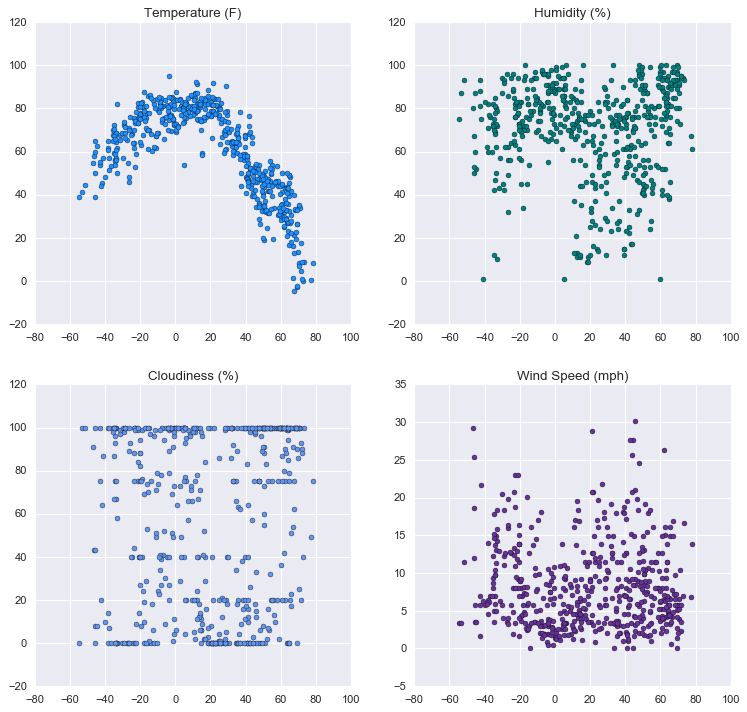

In [288]:
# Run plot function to create plots
plot()

# Separate values into Northern and Southern Hemispheres

In [289]:
hemisphere = []
for index, row in df.iterrows():
    lat = row["Latitude"]
    if lat >= 0:
        hem = "Northern"
        hemisphere.append(hem)
    elif lat < 0:
        hem = "Southern"
        hemisphere.append(hem)
df["Hemisphere"] = hemisphere
df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Hemisphere
0,"Ushuaia, AR",-54.8000,-68.3000,38.86,75,0,3.44,Southern
1,"Umm Lajj, SA",25.0213,37.2685,75.43,54,1,8.95,Northern
2,"Council Bluffs, US",41.2619,-95.8608,49.44,53,100,19.57,Northern
3,"Olafsvik, IS",64.8945,-23.7142,45.43,71,79,6.64,Northern
4,"Busselton, AU",-33.6500,115.3333,68.56,50,100,11.30,Southern


In [290]:
n_hem = df.loc[(df["Hemisphere"]) == "Northern"]
s_hem = df.loc[(df["Hemisphere"]) == "Southern"]

In [291]:
n_lats = n_hem["Latitude"]
s_lats = s_hem["Latitude"]
n_longs = n_hem["Longitude"]
s_longs = s_hem["Longitude"]
n_temps = n_hem["Temperature"]
s_temps = s_hem["Temperature"]
n_humids = n_hem["Humidity"]
s_humids = s_hem["Humidity"]
n_clouds = n_hem["Cloudiness"]
s_clouds = s_hem["Cloudiness"]
n_winds = n_hem["Wind Speed"]
s_winds = s_hem["Wind Speed"]

In [293]:
northern = [n_temps, n_humids, n_clouds, n_winds]
southern = [s_temps, s_humids, s_clouds, s_winds]
n_save = ["Output/Images/Northern Hemisphere/temperature_vs_lat.png","Output/Images/Northern Hemisphere/humidity_vs_lat.png","Output/Images/Northern Hemisphere/cloudiness_vs_lat.png","Output/Images/Northern Hemisphere/windspeed_vs_lat.png"]
s_save = ["Output/Images/Southern Hemisphere/temperature_vs_lat.png","Output/Images/Southern Hemisphere/humidity_vs_lat.png","Output/Images/Southern Hemisphere/cloudiness_vs_lat.png","Output/Images/Southern Hemisphere/windspeed_vs_lat.png"]

In [300]:
def n_plot():
    for i in range(len(northern)):
        fig = plt.scatter(n_lats, northern[i], c=colors[i], marker='o')
        plt.ylabel(names[i])
        plt.xlabel('Latitude')
        plt.xlim(0,n_lats.max())

        slope, int, r, p, std_err = stats.linregress(n_lats, northern[i])
        y = slope*n_lats+int
        line = plt.plot(n_lats,y,c=line_colors[i], linewidth=2)

#         line_str = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
#         plt.annotate(line_str,(-40,font_loc[i]),fontsize=12,color=font_colors[i])

        plt.savefig(n_save[i])

#         plt.show()
        print(f'Plot created for {names[i]} vs. Latitude (Northern Hemisphere)')
        print(f'      r_value = {round(r,2)}')
        print('')
        slope, int, r, p, std_err = [0,0,0,0,0]
        plt.clf()

    figure, axis = plt.subplots(2,2,figsize=(12,12))

    axis[0,0].scatter(n_lats, northern[0],c=colors[0])
    axis[0,0].set_title(f'{names[0]} vs. Latitude (Northern Hemisphere)')

    axis[0,1].scatter(n_lats, northern[1],c=colors[1])
    axis[0,1].set_title(f'{names[1]} vs. Latitude (Northern Hemisphere)')

    axis[1,0].scatter(n_lats, northern[2],c=colors[2])
    axis[1,0].set_title(f'{names[2]} vs. Latitude (Northern Hemisphere)')

    axis[1,1].scatter(n_lats, northern[3],c=colors[3])
    axis[1,1].set_title(f'{names[3]} vs. Latitude (Northern Hemisphere)')

In [301]:
def s_plot():
    for x in range(len(southern)):
        fig = plt.scatter(s_lats, southern[x], c=colors[x], marker='o')
        plt.ylabel(names[x])
        plt.xlabel('Latitude')
        plt.xlim(s_lats.min(),0)

        slope, int, r, p, std_err = stats.linregress(s_lats, southern[x])
        y = slope*s_lats+int
        line = plt.plot(s_lats,y,c=line_colors[x], linewidth=2)

#         line_str = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
#         plt.annotate(line_str,(-40,font_loc[i]),fontsize=12,color=font_colors[i])
        plt.savefig(s_save[x])

#         plt.show()
        print(f'Plot created for {names[x]} vs. Latitude (Southern Hemisphere)')
        print(f'      r_value = {round(r,2)}')
        print('')
        slope, int, r, p, std_err = [0,0,0,0,0]
        plt.clf()

    figure, axis = plt.subplots(2,2,figsize=(12,12))

    axis[0,0].scatter(s_lats, southern[0],c=colors[0])
    axis[0,0].set_title(f'{names[0]} vs. Latitude (Southern Hemisphere)')

    axis[0,1].scatter(s_lats, southern[1],c=colors[1])
    axis[0,1].set_title(f'{names[1]} vs. Latitude (Southern Hemisphere)')

    axis[1,0].scatter(s_lats, southern[2],c=colors[2])
    axis[1,0].set_title(f'{names[2]} vs. Latitude (Southern Hemisphere)')

    axis[1,1].scatter(s_lats, southern[3],c=colors[3])
    axis[1,1].set_title(f'{names[3]} vs. Latitude (Southern Hemisphere)')

Plot created for Temperature (F) vs. Latitude (Northern Hemisphere)
      r_value = -0.9

Plot created for Humidity (%) vs. Latitude (Northern Hemisphere)
      r_value = 0.17

Plot created for Cloudiness (%) vs. Latitude (Northern Hemisphere)
      r_value = 0.22

Plot created for Wind Speed (mph) vs. Latitude (Northern Hemisphere)
      r_value = 0.06



<Figure size 640x440 with 0 Axes>

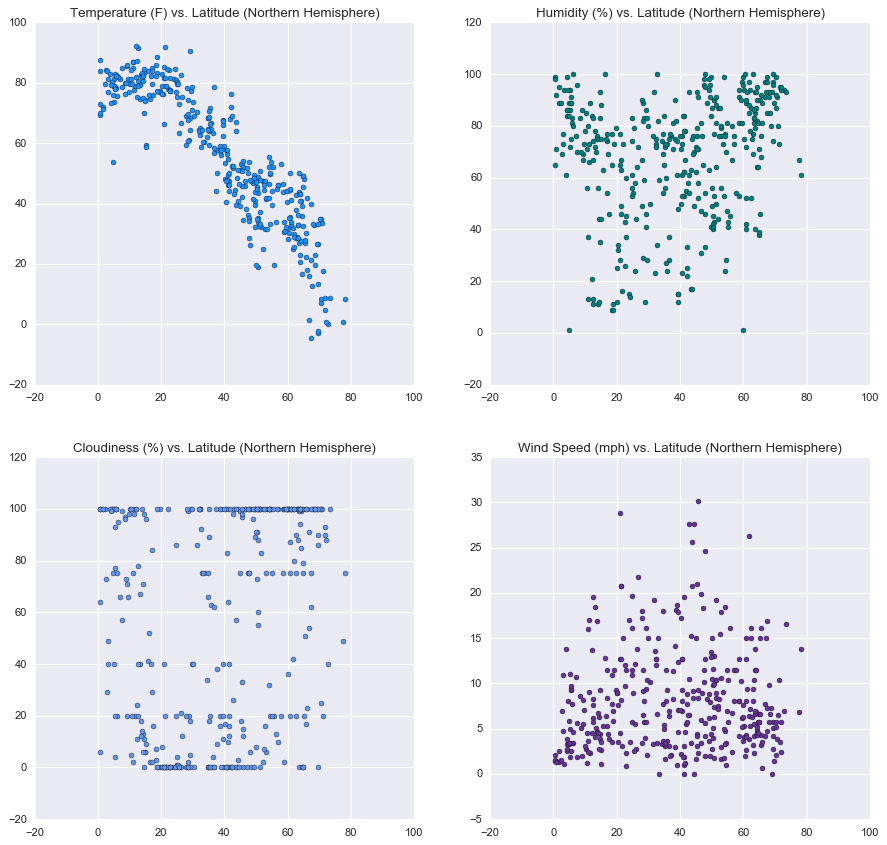

In [302]:
# Run n_plot function to plot Northern Hemisphere
n_plot()

Plot created for Temperature (F) vs. Latitude (Southern Hemisphere)
      r_value = 0.74

Plot created for Humidity (%) vs. Latitude (Southern Hemisphere)
      r_value = 0.33

Plot created for Cloudiness (%) vs. Latitude (Southern Hemisphere)
      r_value = 0.08

Plot created for Wind Speed (mph) vs. Latitude (Southern Hemisphere)
      r_value = -0.34



<Figure size 640x440 with 0 Axes>

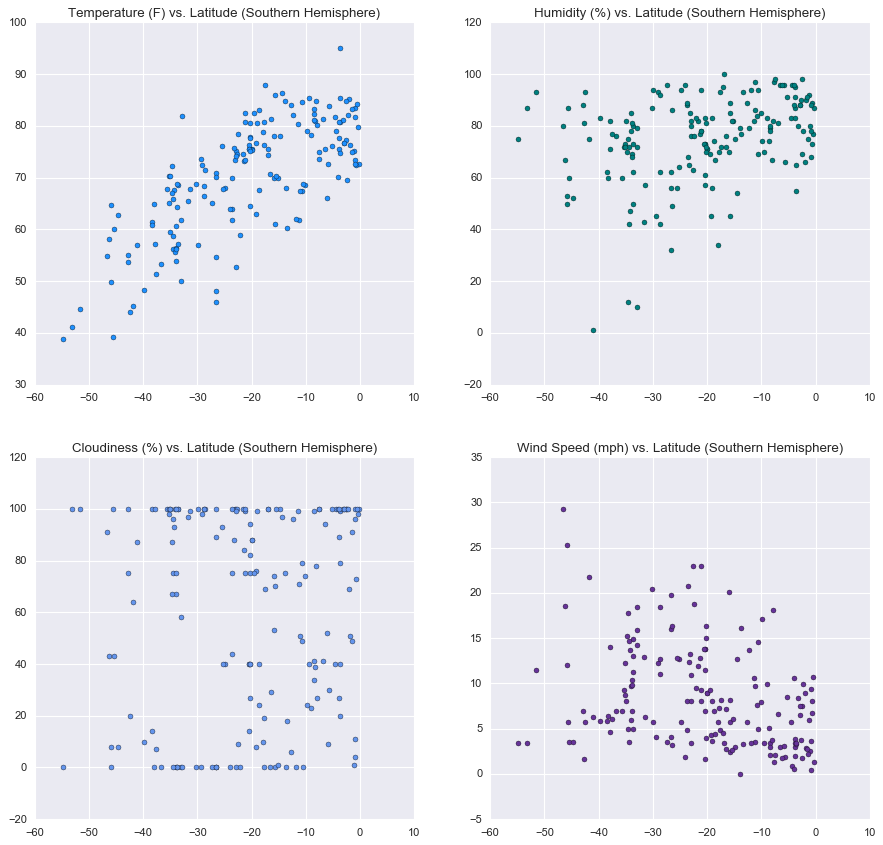

In [303]:
# Run s_plot function to plot Southern Hemisphere
s_plot()